In [2]:
# i want to see if I can open the zarr stores being written by conversion

# to pick up incomplete conversion, need to check to see where the saving stopped (zoom level)
import numpy as np

import xarray as xr

import zarr

import healpy as hp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [3]:
zfil = "/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND3/v4/DYAMOND_diag_1h_to_hp9.zarr"


try:
   zarr_obj = zarr.open(zfil, mode='r')
   ds = xr.open_zarr(zarr_obj)
   print("did it from object")
except:
   print("just open")
   ds = xr.open_zarr(zfil)

print(ds) # Inspect the loaded dataset

print(ds['time'])

just open
<xarray.Dataset> Size: 705MB
Dimensions:         (time: 2, cell: 3145728)
Coordinates:
  * time            (time) datetime64[ns] 16B 2020-01-20 2020-01-20T01:00:00
Dimensions without coordinates: cell
Data variables: (12/29)
    lwdnt           (time, cell) float32 25MB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    lwupbc_tavg     (time, cell) float32 25MB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    lwupbc          (time, cell) float32 25MB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    lwdnbc_tavg     (time, cell) float32 25MB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    lwdnbc          (time, cell) float32 25MB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    swupb           (time, cell) float32 25MB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ...              ...
    swdnt_tavg      (time, cell) float32 25MB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    swupt           (time, cell) float32 25MB dask.arr

In [4]:
ds.time.compute()

<xarray.DataArray 'time' (time: 2)> Size: 16B
array(['2020-01-20T00:00:00.000000000', '2020-01-20T01:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 16B 2020-01-20 2020-01-20T01:00:00

In [5]:
12*8**2

768

In [6]:

data_var = 'swupt'  # Replace with your data variable name
nside = hp.npix2nside(len(ds.cell))
healpix_map = ds[data_var].values  # Extract HEALPix data as a NumPy array

# Get the coordinates for the pixels (if necessary)
theta, phi = hp.pix2ang(nside, range(len(healpix_map)))  # theta and phi in radians

 # Convert from healpy theta, phi (in radians) to lon, lat (in degrees)
lon = np.rad2deg(phi)
lat = 90 - np.rad2deg(theta)

In [7]:
healpix_map.shape

(2, 3145728)

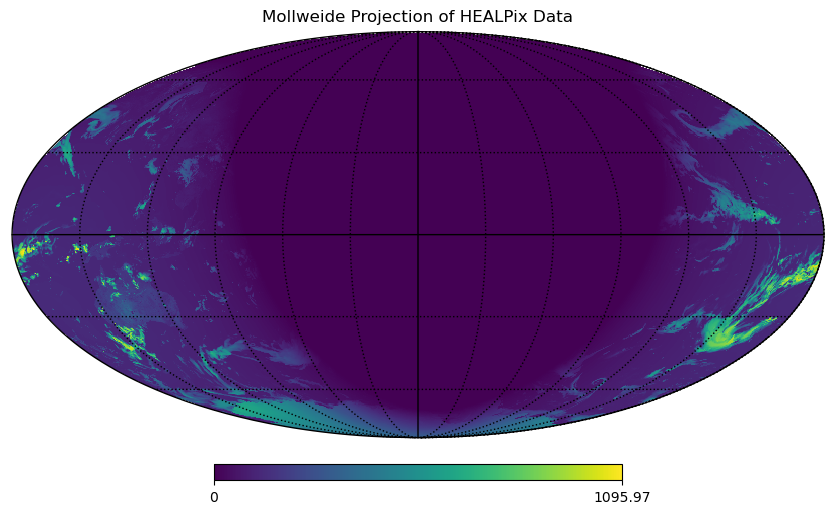

In [8]:
# Visualize the map in Mollweide projection
hp.mollview(healpix_map[1,:], title='Mollweide Projection of HEALPix Data', nest=True)
hp.graticule()  # Add meridians and parallels
# plt.show()


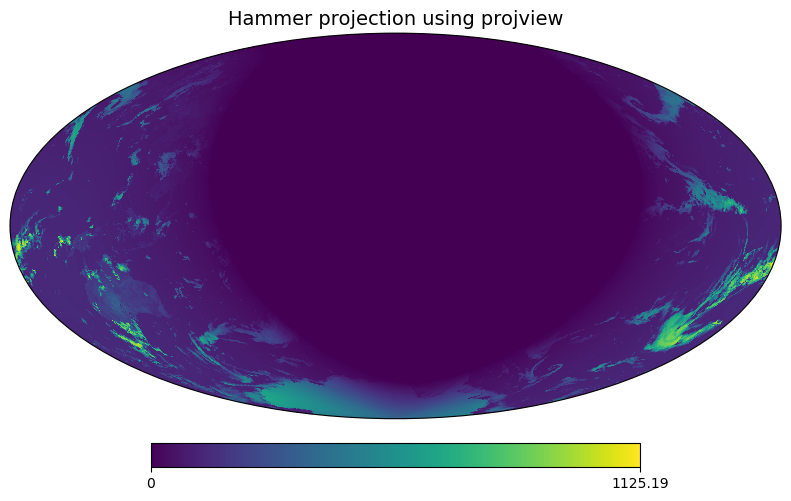

In [9]:

# Visualize the map in Gnomonic projection
# hp.gnomview(healpix_map[10,:], title='Gnomonic Projection of HEALPix Data', rot=(0, 45, 0)) # Rotation can be customized
# plt.show()

hp.projview(healpix_map[1,:], title='Hammer projection using projview', projection_type='hammer', coord=['C'], nest=True)


In [10]:
import uxarray as ux
uxds = ux.UxDataset.from_healpix(ds)

In [11]:
uxds[data_var].isel(time=1).plot(cmap="inferno", projection=ccrs.Orthographic(central_longitude=180), title="Remapped Data")

:Image   [Longitude,Latitude]   (Longitude_Latitude swupt)